<a href="https://colab.research.google.com/github/Maryam-Zubair/Data-Science/blob/main/5_02_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
%matplotlib inline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# Bank Marketing Data - A Decision Tree Approach

## Aim:
The aim of this attempt is to predict if the client will subscribe (yes/no) to a term deposit, by building a classification model using Decision Tree.
### Step 1: Load the data
- Load `bank.csv' data
- Check the first five observations
- Check if there are any null values

In [ ]:
bank = pd.read_csv('bank.csv')

In [ ]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [ ]:
bank.isnull().any(axis=0).astype(int)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
cols = bank.columns

In [ ]:
cols

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
bank.shape

(11162, 17)

In [ ]:
np.unique(bank.deposit, return_counts=True)

(array(['no', 'yes'], dtype=object), array([5873, 5289]))

## Summay of data

### Categorical Variables :
**[1] job      :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital  :** married, single, divorced
<br>**[3] education:** secondary, tertiary, primary, unknown
<br>**[4] default  :** yes, no
<br>**[5] housing  :** yes, no
<br>**[6] loan     :** yes, no
<br>**[7] deposit  :** yes, no ** (Dependent Variable)**
<br>**[8] contact  :** unknown, cellular, telephone
<br>**[9] month    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome:** unknown, other, failure, success

### Numerical Variables:
**[1] age
<br>[2] balance
<br>[3] day
<br>[4] duration
<br>[5] campaign
<br>[6] pdays
<br>[7] previous **

### Step 2: Transformer
- Create a trasnformer pipeline for numeric and categorical features. numerical features will be imputed and scaled. Categorical features will be imputed and encoded
- Create a Column transformer

In [ ]:
categorical = bank.select_dtypes(include=['object']).columns
numerical = bank.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
le = LabelEncoder()

In [ ]:
bank['deposit_e1'] = le.fit_transform(bank.deposit)

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_e1
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,1
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,1
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,1
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,1
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes,1


In [ ]:
X = bank.drop(['deposit','deposit_e1'], axis=1)

In [ ]:
y = bank.deposit_e1

In [ ]:
bank2 = bank.copy()

In [ ]:
bank2.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
deposit_e1     int64
dtype: object

In [ ]:
A = lambda x: '$'+str(x)

In [ ]:
bank2.balance = bank2.balance.apply(A)

In [ ]:
bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_e1
0,59,admin.,married,secondary,no,$2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,$45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,$1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,$2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,$184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


In [ ]:
bank2.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance       object
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
deposit_e1     int64
dtype: object

In [ ]:
# dont want dollar and string to float
B = lambda z : float(z[1:])

In [ ]:
bank2.balance = bank2.balance.apply(B)

In [ ]:
bank2.balance

0        2343.0
1          45.0
2        1270.0
3        2476.0
4         184.0
          ...  
11157       1.0
11158     733.0
11159      29.0
11160       0.0
11161       0.0
Name: balance, Length: 11162, dtype: float64

# LETS BEGIN CREATING 'TRANSFORMER'

In [ ]:
# numeric : imputation and scaling
numerical_transformer = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [ ]:
# categorical : # imputation and ohe
categorical_transformer = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

# remove the target from cat and num lists

In [ ]:
categorical_l = X.select_dtypes(include=['object']).columns
numerical_l = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num',numerical_transformer, numerical_l),('cat',categorical_transformer, categorical_l)])

### Step 3: Classifier
- Create a pipeline for the decision tree classifier as well as the transformer
- Encode the target variable using `LabelEncoder`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, random_state=0)

In [ ]:
classifier = Pipeline(steps = [('column_tranformer',preprocessor),('dt',dt)])

### Step 4: Model
- Create a pipeline for the decision tree classifier as well as the transformer
- Encode the target variable using `LabelEncoder`

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [ ]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('column_tranformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('dt', DecisionTreeClassifier(max_depth=4, random_state=0))])

In [ ]:
classifier.score(X_train,y_train)

0.7804905364542502

In [ ]:
classifier.score(X_test,y_test)

0.7832512315270936

to identify whihc value for decison tree is best , max depth : GO for Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# dt name of decision tree in pipeline
myparams = {'dt__max_depth': np.arange(1,21)}

In [ ]:
mygrid = GridSearchCV(classifier, param_grid = myparams , cv=10, return_train_score=True)

In [ ]:
mygrid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_tranformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                                       ('dt',
                                        DecisionTreeClassifier(max_depth=4,
                                                               random_state=0))]),
             param_grid={'dt__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True)

In [ ]:
results = pd.DataFrame(mygrid.cv_results_)

In [ ]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_dt__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

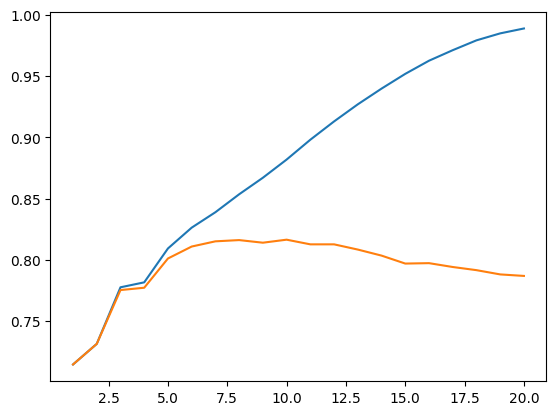

In [ ]:
plt.plot(results.param_dt__max_depth,results.mean_train_score )
plt.plot(results.param_dt__max_depth,results.mean_test_score )